# 顔画像を近似する連立方程式のPythonによる実装

連立方程式
$
A \boldsymbol{x} = \boldsymbol{b}
$
を解くPythonの実装を行う．

ただし，$A$の各列を画像にする．
つまり，画像データセット中の複数の学習画像$A$を用いて，
対象となるテスト画像$\boldsymbol{b}$を近似する問題を扱う．
求めるベクトル$\boldsymbol{x}$は，各学習画像に対する係数となる．


# 顔画像データセットの準備

In [1]:
# load modules

import numpy as np

import skimage.data

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
plt.gray();

import sklearn
from sklearn.datasets import fetch_olivetti_faces


<Figure size 432x288 with 0 Axes>

In [2]:
# check versions

print("sklearn version :", sklearn.__version__, " >= 0.18.0")
print("skimage version :", skimage.__version__, " >= 0.12.0")
print("numpy version :", np.__version__, " >= 0.12.0")
print("matplotlib version:", matplotlib.__version__, ">= 2.0.0")

sklearn version : 0.22.2.post1  >= 0.18.0
skimage version : 0.16.2  >= 0.12.0
numpy version : 1.19.5  >= 0.12.0
matplotlib version: 3.2.2 >= 2.0.0


## 顔画像データセットのダウンロード

ここではsklearnのデータセットとして準備されているOlivetti facesデータセットを用いる．
詳しくは[sklearnのマニュアル](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)を参照．

このデータセットには400枚の顔画像があり，それぞれが4096次元のベクトルである（64x64画像を表す）．

In [3]:
# load the face dataset

dataset = fetch_olivetti_faces(shuffle=False)
faces = dataset.data

In [4]:
# faces has images as its row vectors

nsamples, dim = faces.shape
print("there are", nsamples, "samples of dimension", dim)

there are 400 samples of dimension 4096


In [5]:
# see the inside of faces

faces

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

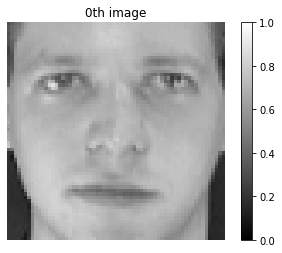

In [6]:
# show 0-th image with colorbar (pixel values range from 0 to 1)

# reshape(64,64) converts a vector into a 64x64 image 
imshow(faces[0].reshape(64,64), vmin=0, vmax=1) # set vmin=0 and vmax=1 to display value 0 to be black, and 1 white (otherwise min value is black and max value is white)

plt.colorbar() # show colorbar
plt.axis('off') # turn off border ticks
plt.title("0th image"); # set title

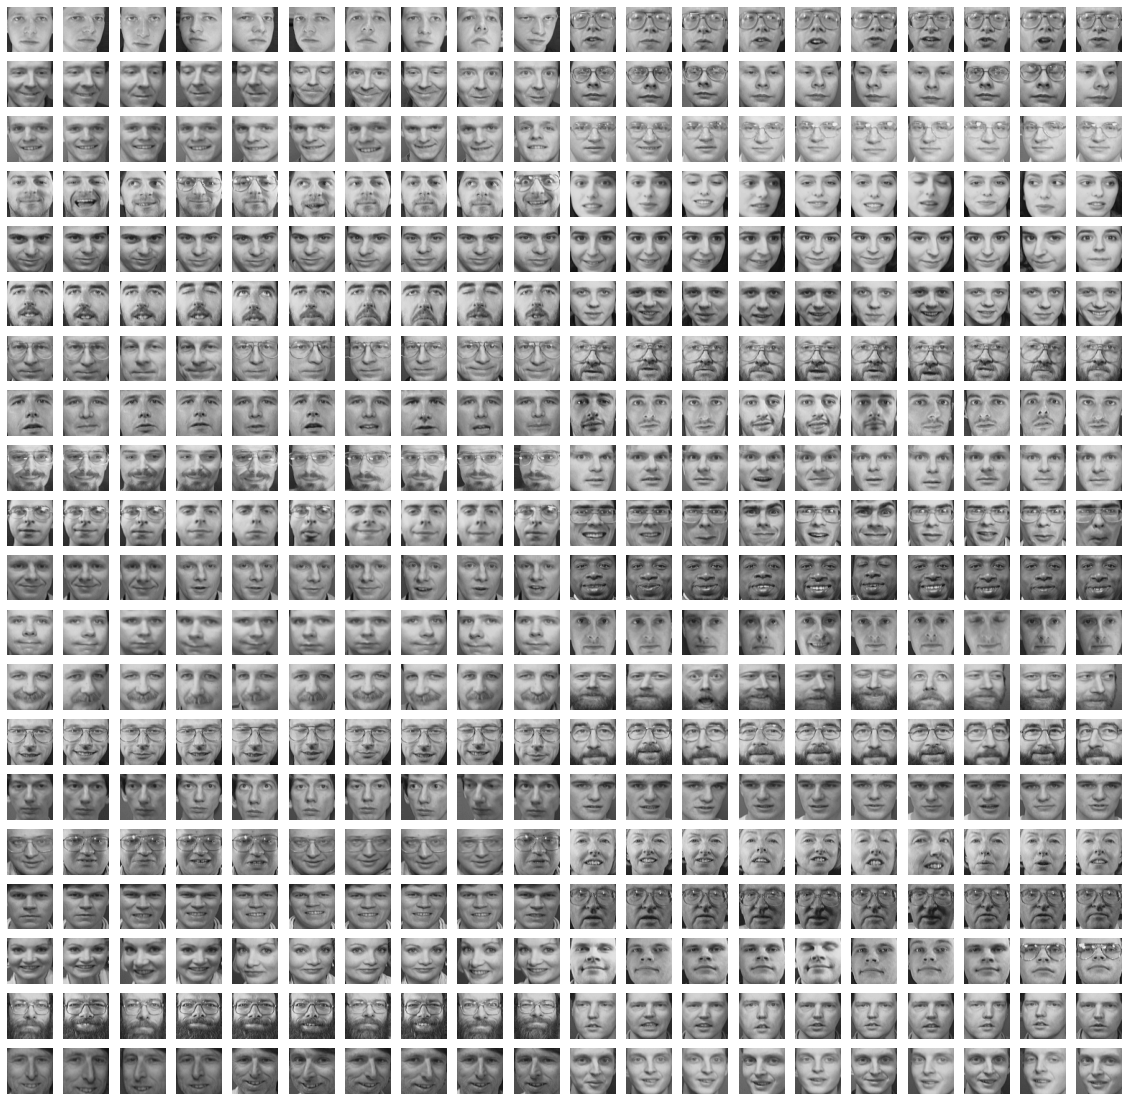

In [7]:
# show all 400 images. takes time, wait for a while....

plt.figure(figsize=(20, 20))
for i, p in enumerate(faces):
    plt.subplot(20, 20, i + 1)
    
    plt.imshow(faces[i].reshape(64,64), vmin=0, vmax=1)
    
    plt.axis('off')

# 行列$A$の定義


データセットの各学習画像をベクトル$\boldsymbol{x}_i$とみなす．
各画像は2次元配列だが，1次元配列にreshapeする（Olivetti facesデータセットの場合にはすでに各画像が1次元配列になっている）．
学習画像として最初の200枚を用いることにする．


In [8]:
A = faces[:200].transpose()

`A`の各列は4096次元のベクトルである．

In [9]:
A.shape

(4096, 200)

テスト画像であるベクトル$\boldsymbol{b}$としては201〜400枚目のどれかを用いる．

In [10]:
b = faces[201] # 例えば201枚目

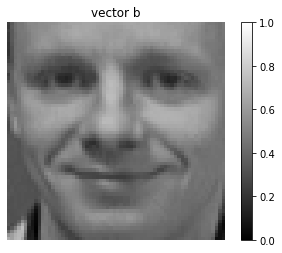

In [11]:
imshow(b.reshape(64,64), vmin=0, vmax=1)

plt.colorbar()
plt.axis('off')
plt.title("vector b");

# 連立方程式を解く

$A$は正方行列ではないため，一般化逆行列を用いて$x$を求める．

In [12]:
# x = (A^T A)^{-1} A^T b
# x_solution = np.linalg.inv(A.transpose().dot(A)).dot(A.transpose().dot(b))
x_solution = np.linalg.inv(A.T @ A) @ (A.T @ b)

なお，通常の実装上で逆行列を用いてはならない（逆行列が存在しないかもしれないし，存在しても条件数が悪いかもしれない．また逆行列の計算コストが大きい）．


In [13]:
print('|A^T A| = ', np.linalg.det(A.T @ A))
print('|A A^T| = ', np.linalg.det(A @ A.T))
print('rank(A) = ', np.linalg.matrix_rank(A))
print('rank(A A^T)', np.linalg.matrix_rank(A @ A.T), ' <= rank(A)rank(A^T)')
print('rank(A^T A)', np.linalg.matrix_rank(A.T @ A), ' <= rank(A)rank(A^T)')
# 0かどうかのしきい値tolを変更してみる
print('rank(A A^T)', np.linalg.matrix_rank(A @ A.T, tol=0.1), ' <= rank(A)rank(A^T)')
print('rank(A^T A)', np.linalg.matrix_rank(A.T @ A, tol=0.1), ' <= rank(A)rank(A^T)')

|A^T A| =  inf
|A A^T| =  -0.0
rank(A) =  200
rank(A A^T) 17  <= rank(A)rank(A^T)
rank(A^T A) 128  <= rank(A)rank(A^T)
rank(A A^T) 200  <= rank(A)rank(A^T)
rank(A^T A) 200  <= rank(A)rank(A^T)




そのかわりに，`np.linalg.solve`を用いる．これは`Ax=b`を数値的に安定かつ効率的（高速に）解くものであり，`solve(A,b)`で`x`を返す．

そこで，ここでは以下のように`solve(A^T A, A^T b)`とすると`x`が得られる．

In [14]:
# x_solution_np = np.linalg.solve(A.transpose().dot(A), A.transpose().dot(b))
x_solution_np = np.linalg.solve(A.T @ A, A.T @ b)

In [15]:
np.linalg.norm(x_solution - x_solution_np)

0.00034607737

求めた係数ベクトル$x$を用いて$Ax$を計算し，画像として表示して，これが$b$とどれだけ似ているのかを確認する．

In [16]:
x = x_solution_np

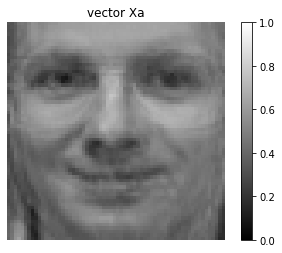

In [17]:
imshow((A @ x).reshape(64,64), vmin=0, vmax=1)

plt.colorbar()
plt.axis('off')
plt.title("vector Xa");

In [18]:
rmse = np.linalg.norm(A @ x - b) / b.shape[0]
print("RMSE: ", rmse)

RMSE:  0.0006026484188623726


係数ベクトル$x$の要素の内，大きい方から10個の要素の値と，それに対応する学習画像を表示する．これらは画像$b$を再構成する時に最も寄与が大きい．

In [19]:
rank = np.argsort(x)[::-1] # sort in decending order

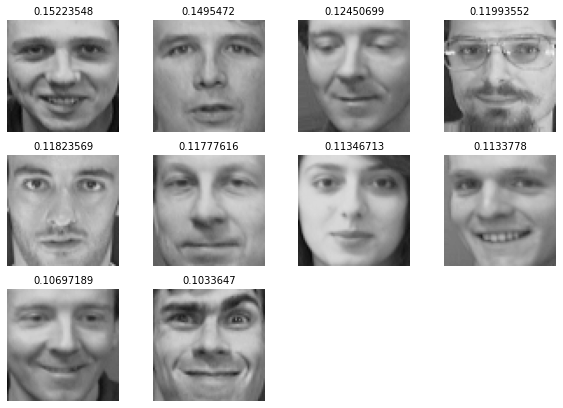

In [20]:
plt.figure(figsize=(10, 7))

for i, top_rank in enumerate(rank[:10]):
    plt.subplot(3, 4, i + 1)
    
    plt.imshow(A[:, top_rank].reshape(64,64), vmin=0, vmax=1)
    plt.title(x[top_rank], fontsize=10)
    plt.axis('off')

$A^T b$は$b$と$A$の各列との類似度である．この類似度の大きい方から10個の要素の値と，それに対応する学習画像を表示する．これらは類似度としては大きいが，$b$を再構成するためには不向きである．

同じ人物の画像と類似度が高い．この理由は，ベクトルのノルムが大きいと類似度も大きくなってしまう，つまり明るい画像はどんな画像とも類似度が大きいためである．

In [21]:
# similarity = A.transpose() @ b
similarity = A.T @ b
similarity_rank = np.argsort(similarity)[::-1] # sort in decending order

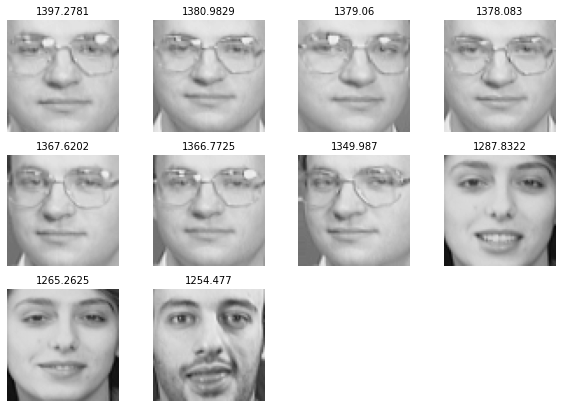

In [22]:
plt.figure(figsize=(10, 7))

for i, top_rank in enumerate(similarity_rank[:10]):
    plt.subplot(3, 4, i + 1)
    
    plt.imshow(A[:, top_rank].reshape(64,64), vmin=0, vmax=1)
    plt.title(similarity[top_rank], fontsize=10)
    plt.axis('off')

## Task

- 学習画像枚数$N$を変えて，求めた係数ベクトル$\hat{x}$によるRMSE（$\frac{1}{4096}\| A \hat{x} - b \|$）を求め，横軸に$N$をとってRMSEをプロットせよ．$N$を大きくするに連れてRMSEは小さくなり，再構成された画像$b$の画質は良くなるはずである．テスト画像$b$を取り替えて同様に行い，どのような傾向が見られるのかを議論せよ．
- テスト画像$b$に，学習に用いた画像（つまり$A$のどれかの列）を用いた場合，係数ベクトル・類似度・RMSEはどうなるか，$N$を変えて実験し，結果を議論せよ．
- $A$の各列をノルム1に正規化した場合に，類似度の高い画像は再構成のための画像と一致するかどうかを確認せよ．
- [手書き数字画像データセット](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
に対しても同様の実験を行い，結果を議論せよ．$N \ge 64$の場合，RMSEは0になるが，その理由を考察せよ．

